## Plots of the Y2H and MAPPIT tests of the new literature curated datasets.

In [1]:
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from utils import validation_plot
from custom_settings import *


%matplotlib inline

In [2]:
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7.0
mpl.rcParams['savefig.dpi'] = 500

In [3]:
hs12 = pd.read_csv('../data/processed/Supplementary Table 23.txt', sep='\t')


def per_pair_score(vals):
    """Collapse values per-orientation into a single value"""
    if len(vals) == 1:
        return {'0': 0, '1': 1, 'AA': np.nan, np.nan: np.nan}[vals.values[0]]
    a, b = vals.values
    if a == '1' or b == '1':
        return 1
    elif a == '0' or b == '0':
        return 0
    else:
        return np.nan

    
hs12['orf_id_a'] = hs12[['ad_orf_id', 'db_orf_id']].min(axis=1)
hs12['orf_id_b'] = hs12[['ad_orf_id', 'db_orf_id']].max(axis=1)
hs12 = hs12.groupby(['source', 'orf_id_a', 'orf_id_b']).agg({'final_score': per_pair_score}).reset_index()

In [4]:
val = pd.read_csv('../data/processed/Supplementary Table 24.txt', sep='\t')

Lit-BM-13: 225; Lit-BM-LT-17: 221; Lit-BM-HT-17: 231; Lit-BS-LT-17: 223; Lit-BS-HT-17: 219; Lit-NB-17: 233


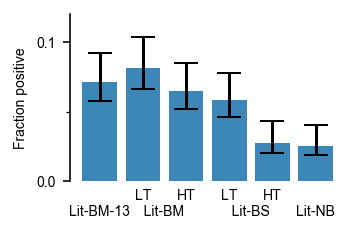

In [5]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(2.5, 1.6)
sources = ['Lit-BM-13',
           'Lit-BM-LT-17',
           'Lit-BM-HT-17',
           'Lit-BS-LT-17',
           'Lit-BS-HT-17',
           'Lit-NB-17',]
validation_plot(data=hs12,
                selections=[hs12['source'] == s for s in sources],
                ax=ax,
                colors=[LIT_COLOR] * len(sources),
                y_max=0.12,
                result_column='final_score',
                draw_numbers=False,
                errorbar_capsize=0.7)
print('; '.join([s + ': ' + str(((hs12['source'] == s) & hs12['final_score'].notnull()).sum()) for s in sources]))
ax.set_xticklabels(['\nLit-BM-13',
                    'LT\n           Lit-BM', 'HT',
                    'LT\n           Lit-BS', 'HT',
                    '\nLit-NB'], rotation=0)
ax.xaxis.set_tick_params(length=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('1.')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/lit17_y2h' + fmt)

Lit-BM-13: 191; Lit-BM-LT-17: 233; Lit-BM-HT-17: 235; Lit-BS-LT-17: 233; Lit-BS-HT-17: 238; Lit-NB-17: 227


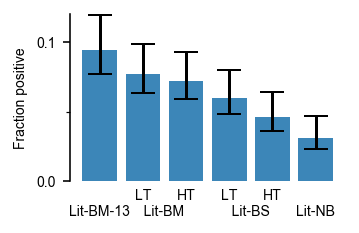

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(2.5, 1.6)
sources = ['Lit-BM-13',
           'Lit-BM-LT-17',
           'Lit-BM-HT-17',
           'Lit-BS-LT-17',
           'Lit-BS-HT-17',
           'Lit-NB-17',]
validation_plot(data=val,
                selections=[val['source'] == s for s in sources],
                colors=[LIT_COLOR] * len(sources),
                y_max=0.12,
                draw_numbers=False,
                errorbar_capsize=0.7)
print('; '.join([s + ': ' + str(((val['source'] == s) & val['result'].notnull()).sum()) for s in sources]))
ax.set_xticklabels(['\nLit-BM-13',
                    'LT\n           Lit-BM', 'HT',
                    'LT\n           Lit-BS', 'HT',
                    '\nLit-NB'], rotation=0)
ax.xaxis.set_tick_params(length=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('1.')
plt.title('')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/lit17_mappit' + fmt)

In [7]:
n_per_cat = {'Lit-NB': 140592,
             'Lit-BS-HT': 21409,
             'Lit-BM': 7507,
             'Lit-BM-HT': 3714,
             'Lit-BS': 3318}
# merge HT and LT by weighting them
val['weight'] = 1.
val.loc[val['source'] == 'Lit-BS-LT-17',
        'weight'] = (n_per_cat['Lit-BS'] / val.loc[val['source'] == 'Lit-BS-LT-17',
                                                   'result'].notnull().sum())
val.loc[val['source'] == 'Lit-BS-HT-17',
        'weight'] = (n_per_cat['Lit-BS-HT'] / val.loc[val['source'] == 'Lit-BS-HT-17',
                                                   'result'].notnull().sum())
val.loc[val['source'] == 'Lit-BM-LT-17',
        'weight'] = (n_per_cat['Lit-BM'] / val.loc[val['source'] == 'Lit-BM-LT-17',
                                                   'result'].notnull().sum())
val.loc[val['source'] == 'Lit-BM-HT-17',
        'weight'] = (n_per_cat['Lit-BM-HT'] / val.loc[val['source'] == 'Lit-BM-HT-17',
                                                   'result'].notnull().sum())

In [8]:
val['merged_source'] = val['source'].copy()
val.loc[val['source'] == 'Lit-BS-LT-17', 'merged_source'] = 'Lit-BS-17'
val.loc[val['source'] == 'Lit-BM-LT-17', 'merged_source'] = 'Lit-BM-17'
val.loc[val['source'] == 'Lit-BS-HT-17', 'merged_source'] = 'Lit-BS-17'
val.loc[val['source'] == 'Lit-BM-HT-17', 'merged_source'] = 'Lit-BM-17'

In [9]:
hs12['weight'] = 1.
hs12.loc[hs12['source'] == 'Lit-BS-LT-17',
        'weight'] = (n_per_cat['Lit-BS'] / hs12.loc[hs12['source'] == 'Lit-BS-LT-17',
                                                   'final_score'].notnull().sum())
hs12.loc[hs12['source'] == 'Lit-BS-HT-17',
        'weight'] = (n_per_cat['Lit-BS-HT'] / hs12.loc[hs12['source'] == 'Lit-BS-HT-17',
                                                   'final_score'].notnull().sum())
hs12.loc[hs12['source'] == 'Lit-BM-LT-17',
        'weight'] = (n_per_cat['Lit-BM'] / hs12.loc[hs12['source'] == 'Lit-BM-LT-17',
                                                   'final_score'].notnull().sum())
hs12.loc[hs12['source'] == 'Lit-BM-HT-17',
        'weight'] = (n_per_cat['Lit-BM-HT'] / hs12.loc[hs12['source'] == 'Lit-BM-HT-17',
                                                   'final_score'].notnull().sum())
hs12['merged_source'] = hs12['source'].copy()
hs12.loc[hs12['source'] == 'Lit-BS-LT-17', 'merged_source'] = 'Lit-BS-17'
hs12.loc[hs12['source'] == 'Lit-BM-LT-17', 'merged_source'] = 'Lit-BM-17'
hs12.loc[hs12['source'] == 'Lit-BS-HT-17', 'merged_source'] = 'Lit-BS-17'
hs12.loc[hs12['source'] == 'Lit-BM-HT-17', 'merged_source'] = 'Lit-BM-17'

In [10]:
def validation_plot_weighted(data, selections, ax=None,
                            result='result',
                            colors=None, y_max=1.0):
    """Compare the validation rate of different cateogies.

    Missing values are not used in the denominator.

    Args:
        data (DataFrame)
        rowList (OrderedDict(Str: Series)): selection name -> selection of rows
        ax (matplotlib.axes.Axes): Axes to draw plot onto
        result (str): column containing 0/1/nan for result of test
        colors (dict(str: str)): selection name -> color
        y_max (float)

    TODO:
        - checks on input such as 0/1/nan for result
        - better name for rowList

    """
    if ax is None:
        ax = plt.gca()
    if colors is None:
        colors = {k: 'C' + str(i) for i, k in enumerate(selections.keys())}
    usedRows = reduce(lambda a, b: a | b, selections.values())
    val_data = data.loc[usedRows, :].copy()
    ax.set_yticks(np.arange(0.0, 1.0, 0.1), minor=False)
    ax.set_yticks(np.arange(0.05, 1.0, 0.1), minor=True)
    ax.set_facecolor('0.96')
    ax.set_axisbelow(True)
    ax.grid(color='white', axis='y', which='both', zorder=5)
    ps = np.array([(val_data.loc[rows, :][result] == 1).sum()
                   for rows in selections.values()])
    ns = np.array([(val_data.loc[rows, :][result] == 0).sum()
                   for rows in selections.values()])
    fs = np.array([(val_data.loc[rows, result] * val_data.loc[rows, 'weight']).sum() /
                   val_data.loc[rows & val_data[result].notnull(), 'weight'].sum()
                   for rows in selections.values()])
    errs = np.sqrt((fs * (1. - fs)) / (ps + ns))
    for i, name in enumerate(selections.keys()):
        ax.bar(i, fs[i], color=colors[name], label=name)
    ax.errorbar(range(fs.shape[0]), fs, yerr=errs,
                color='black', fmt='none', capsize=5.)
    ax.set_xticks(range(len(selections)))
    ax.set_xticklabels(selections.keys(), rotation=90)
    ax.set_ylim((0., y_max))
    ax.set_ylabel('Fraction positive')

Lit-BM-13: 191; Lit-BM-17: 468; Lit-BS-17: 471; Lit-NB: 227


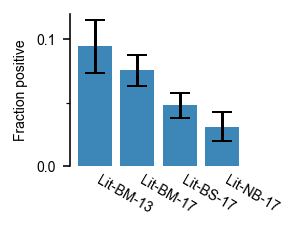

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(2., 1.6)
selection = {'Lit-BM-13': (val['merged_source'] == 'Lit-BM-13'),
             'Lit-BM-17': (val['merged_source'] == 'Lit-BM-17'),
             'Lit-BS-17': (val['merged_source'] == 'Lit-BS-17'),
             'Lit-NB': (val['merged_source'] == 'Lit-NB-17')}
cols = {k: LIT_COLOR for k in selection.keys()}
validation_plot_weighted(val,
                         selection,
                         colors=cols,
                         y_max=0.12)
print('; '.join([ds + ': ' + str((s & val['result'].notnull()).sum()) for ds, s in selection.items()]))
ax.set_xticklabels(['Lit-BM-13', 'Lit-BM-17', 'Lit-BS-17', 'Lit-NB-17'],
                   rotation=-30,
                   ha='left')
ax.xaxis.set_tick_params(length=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('1.')
plt.title('')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/lit17_mappit_merged' + fmt)

Lit-BM-13: 225; Lit-BM-17: 452; Lit-BS-17: 442; Lit-NB: 233


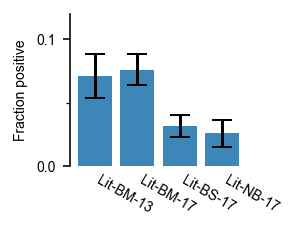

In [12]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(2., 1.6)
selection = {'Lit-BM-13': (hs12['merged_source'] == 'Lit-BM-13'),
             'Lit-BM-17': (hs12['merged_source'] == 'Lit-BM-17'),
             'Lit-BS-17': (hs12['merged_source'] == 'Lit-BS-17'),
             'Lit-NB': (hs12['merged_source'] == 'Lit-NB-17')}
cols = {k: LIT_COLOR for k in selection.keys()}
validation_plot_weighted(hs12, selection, colors=cols, y_max=0.12, result='final_score')
print('; '.join([ds + ': ' + str((s & hs12['final_score'].notnull()).sum()) for ds, s in selection.items()]))
ax.set_xticklabels(['Lit-BM-13', 'Lit-BM-17', 'Lit-BS-17', 'Lit-NB-17'],
                   rotation=-30,
                   ha='left')
ax.xaxis.set_tick_params(length=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_facecolor('1.')
plt.title('')
plt.tight_layout()
for fmt in FORMATS:
    plt.savefig('../figures/lit17_y2h_merged' + fmt)